**1: Import Libraries**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

**2: Define File Paths and Load Data**

In [ ]:
# Define the base directory where your files are located using the absolute path
base_path = r'/content/drive/MyDrive/DataSets/Image Classification CNN Keras Dataset/'


# Concatenate the base path with the file names
X_train_path = base_path + 'input.csv'
Y_train_path = base_path + 'labels.csv'
X_test_path = base_path + 'input_test.csv'
Y_test_path = base_path + 'labels_test.csv'

# Load the data
X_train = np.loadtxt(X_train_path, delimiter=',')
Y_train = np.loadtxt(Y_train_path, delimiter=',')
X_test = np.loadtxt(X_test_path, delimiter=',')
Y_test = np.loadtxt(Y_test_path, delimiter=',')

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

Mounted at /content/drive


**3.Preprocess the Data**

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3) # 100*100
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize pixel values to the range [0, 1]
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


**4: Visualize Sample Image**

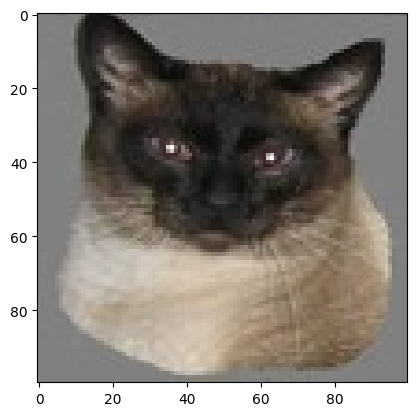

In [ ]:
idx = random.randint(2, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

**5: Define and Compile the CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=3,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore weights from the best epoch
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,083,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

**6: Train the Model**

In [ ]:
model.fit(X_train, Y_train, epochs = 30, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 757ms/step - accuracy: 0.5726 - loss: 0.7705 - val_accuracy: 0.0000e+00 - val_loss: 0.8311
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 779ms/step - accuracy: 0.6068 - loss: 0.6481 - val_accuracy: 0.0625 - val_loss: 0.9124
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 749ms/step - accuracy: 0.6741 - loss: 0.5941 - val_accuracy: 0.5625 - val_loss: 0.7198
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 856ms/step - accuracy: 0.7408 - loss: 0.5303 - val_accuracy: 0.1825 - val_loss: 1.1289
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 779ms/step - accuracy: 0.7623 - loss: 0.4886 - val_accuracy: 0.6050 - val_loss: 0.7095
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 809ms/step - accuracy: 0.8134 - loss: 0.4293 - val_accuracy: 0.4350 - val_loss: 0.9942
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 756ms/step - accuracy: 0.8658 - loss: 0.3518 - val_accuracy: 0.3525 - val_loss: 1.3528
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 762ms/step - accuracy: 0.8739 - loss: 0.3071 - val_

In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7243 - loss: 0.5286


[0.5982282757759094, 0.6875]

**7: Evaluate Model and Make Predictions**

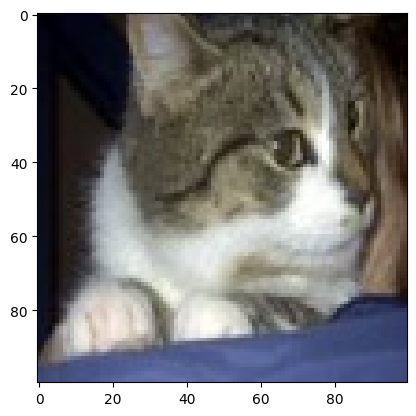

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Our model says it is a : cat


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

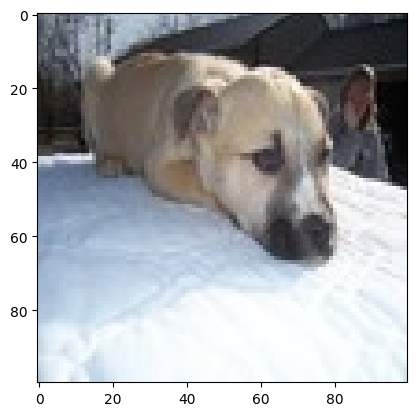

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Our model says it is a : dog


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)